# Regularized Regression : RIDGE


Ridge Regression (also called Tikhonov regularization) is a regularized version of Linear Regression. A regularization term equal is added to the cost function:

$J(\theta) = \text{MSE}(\theta) + \alpha \frac{1}{2} \sum_{i=1}^{n} \theta^2_i$

This forces the learning algorithm to not only fit the data but also keep the model weights as small as possible. Note that the regularization term should only be added to the cost function during training. Once the model is trained, you want to evaluate the model's performance using the unregularized performance measure.

The hyperparameter $\alpha$ controls how much you want to regularize the model. If $\alpha = 0$ then Ridge Regression is just Linear Regression. If $\alpha$ is very large, then all weights end up very close to zero and the result is a flat line going through the data’s mean.

(Example: if we use polynomial regression with Ridge, increasing $\alpha$ leads to flatter (i.e., less extreme, more reasonable) predictions; this reduces the model’s variance but increases its bias.)

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(rc={'figure.figsize':(10,7)})

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

We import the dataset

In [2]:
from sklearn.datasets import load_boston
boston=load_boston()
boston_df=pd.DataFrame(boston.data,columns=boston.feature_names)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [4]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
boston_df["RAD"].value_counts()

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
8.0      24
2.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64

In [6]:
y = pd.DataFrame(boston.target, columns=["prices"])
y.head()

,prices
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [7]:
y.size

506

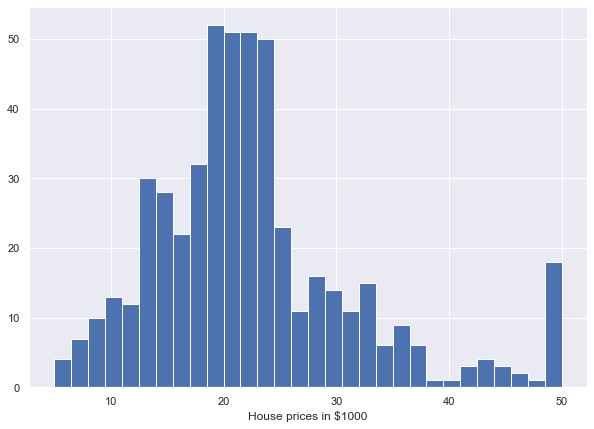

In [8]:
plt.hist(y.prices, bins=30)
plt.xlabel("House prices in $1000")
plt.show()

We can see from the plot that the prices are distributed normally with few outliers. Most of the house are around 20–24 range (in $1000 scale)
Now, we create a correlation matrix that measures the linear relationships between the variables. The correlation matrix can be formed by using the corr function from the pandas dataframe library. We will use the heatmap function from the seaborn library to plot the correlation matrix.

The correlation coefficient ranges from -1 to 1. If the value is close to 1, it means that there is a strong positive correlation between the two variables. When it is close to -1, the variables have a strong negative correlation.

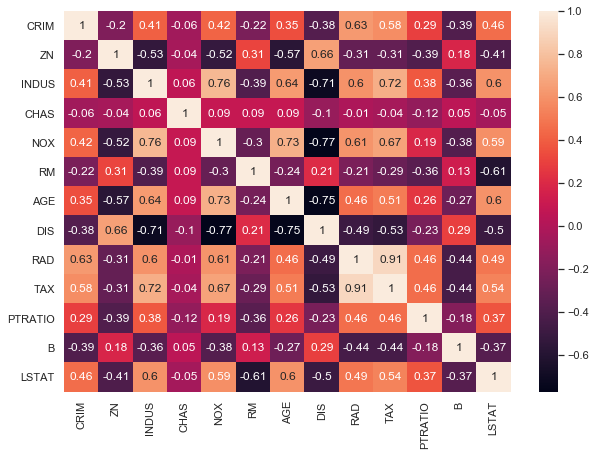

In [9]:
#Created a dataframe without the price col, since we need to see the correlation between the variables
correlation_matrix = boston_df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

An important point in selecting features for a linear regression model is to check for multicolinearity. The features RAD and TAX have a correlation of 0.91. These feature pairs are strongly correlated to each other. This can affect the model. Same goes for the features DIS and AGE which have a correlation of -0.75.

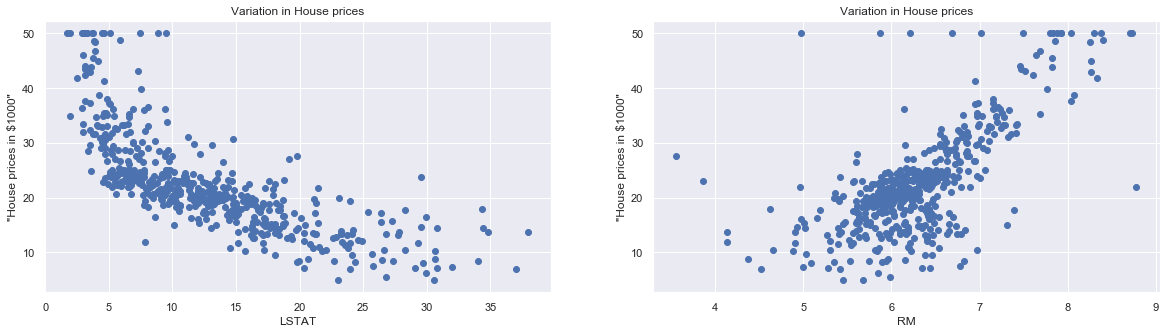

In [10]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = y.prices

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston_df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title("Variation in House prices")
    plt.xlabel(col)
    plt.ylabel('"House prices in $1000"')

The prices increase as the value of RM increases linearly. There are few outliers and the data seems to be capped at 50.
The prices tend to decrease with an increase in LSTAT. Though it doesn’t look to be following exactly a linear line.
Since it is really hard to visualize with the multiple features, we will first predict the house price with just one variable and then move to the regression with all features.
Since ‘RM’ shows positive correlation with the House Prices, we will use this variable.

## Linear regression with just one variable

In [11]:
X_rooms = boston_df.RM

X_rooms = np.array(X_rooms).reshape(-1,1)
y_price = np.array(y).reshape(-1,1)

print(X_rooms.shape)
print(y_price.shape)

(506, 1)
(506, 1)


In [12]:
X_train_1, X_test_1, Y_train_1, Y_test_1 = train_test_split(X_rooms, y_price, test_size = 0.2, random_state=3)

print(X_train_1.shape)
print(X_test_1.shape)
print(Y_train_1.shape)
print(Y_test_1.shape)

(404, 1)
(102, 1)
(404, 1)
(102, 1)


In [13]:
reg_1 = LinearRegression()
reg_1.fit(X_train_1, Y_train_1)

y_train_predict_1 = reg_1.predict(X_train_1)
rmse = (np.sqrt(mean_squared_error(Y_train_1, y_train_predict_1)))
r2 = round(reg_1.score(X_train_1, Y_train_1),2)

print("Model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

Model performance for training set
--------------------------------------
RMSE is 6.758326027582934
R2 score is 0.46


In [14]:
# model evaluation for test set

y_pred_1 = reg_1.predict(X_test_1)
rmse = (np.sqrt(mean_squared_error(Y_test_1, y_pred_1)))
r2 = round(reg_1.score(X_test_1, Y_test_1),2)

print("Model performance for training set")
print("--------------------------------------")
print("Root Mean Squared Error: {}".format(rmse))
print("R^2: {}".format(r2))

Model performance for training set
--------------------------------------
Root Mean Squared Error: 5.950260950477571
R^2: 0.57


We have checked the metris RMSE (Root Mean Squared Error) and R^2.

RMSE is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are; RMSE is a measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit. 
RMSE is a measure of accuracy, to compare forecasting errors of different models for a particular dataset and not between datasets, as it is scale-dependent.
RMSE is always non-negative, and a value of 0 (almost never achieved in practice) would indicate a perfect fit to the data. In general, a lower RMSD is better than a higher one.


R-squared is a goodness-of-fit measure for linear regression models. This statistic indicates the percentage of the variance in the dependent variable that the independent variables explain collectively. R-squared measures the strength of the relationship between your model and the dependent variable on a convenient 0 – 100% scale.

variance: in terms of linear regression, variance is a measure of how far observed values differ from the average of predicted values, i.e., their difference from the predicted value mean. The goal is to have a value that is low. What low means is quantified by the r2 score (explained below).

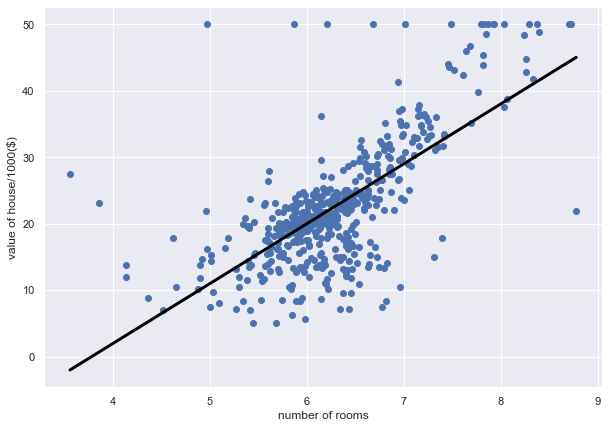

In [15]:
prediction_space = np.linspace(min(X_rooms), max(X_rooms)).reshape(-1,1) 
plt.scatter(X_rooms,y_price)
plt.plot(prediction_space, reg_1.predict(prediction_space), color = 'black', linewidth = 3)
plt.ylabel('value of house/1000($)')
plt.xlabel('number of rooms')
plt.show()

## Regression Model for All the variables

We use `train_test_split ` from the package `sklearn.model_selection`  to create a training sample which contains the 70% of observations and a test sample with the 30% of observations.

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(boston_df, y, test_size = 0.3, random_state=3)

# We should use the standard scaler because Ridge (and most of regularized models)
# are sensitive to the scale of the input features (even though in our case the result is the same).
# -----
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X_train = pd.DataFrame(sc.fit_transform(X_train))
#X_test = pd.DataFrame(sc.transform(X_test))
# -----

X_test.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.00000,152.000000,152.000000
mean,3.444238,13.401316,11.180395,0.059211,0.556571,6.297934,69.584868,3.793639,9.546053,407.703947,18.60000,355.008750,12.607961
std,7.076968,25.997392,6.957929,0.236799,0.115521,0.743579,28.803032,2.106092,8.772201,166.548159,2.14615,92.780954,7.107461
min,0.013110,0.000000,0.740000,0.000000,0.392000,3.863000,6.200000,1.178100,1.000000,188.000000,12.60000,2.600000,1.730000
25%,0.070293,0.000000,5.085000,0.000000,0.458250,5.893750,41.950000,2.091800,4.000000,281.000000,17.40000,374.052500,7.042500
50%,0.286735,0.000000,9.795000,0.000000,0.538000,6.224000,82.700000,2.996800,5.000000,336.000000,19.10000,390.790000,11.430000
75%,3.714463,20.000000,18.100000,0.000000,0.624000,6.623000,94.850000,5.255350,24.000000,666.000000,20.20000,395.645000,16.780000
max,51.135800,100.000000,25.650000,1.000000,0.871000,8.780000,100.000000,10.585700,24.000000,666.000000,22.00000,396.900000,34.370000


We create 3 models: a classic linear regression, a Ridge model with small alpha, and a Ridge model with large alpha.

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
linear_regressor = LinearRegression()
ridge_regressor_small_alpha = Ridge(alpha = 0.01)
ridge_regressor_large_alpha = Ridge(alpha = 100)

We train the models on train data.

In [18]:
linear_regressor.fit(X_train, y_train)
ridge_regressor_small_alpha.fit(X_train, y_train)
ridge_regressor_large_alpha.fit(X_train, y_train)

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

We test the performance of the model on train and test data using RMSE and R2 as metrics.

In [19]:
y_lr_predict_train = linear_regressor.predict(X_train)
y_ridge_small_predict_train = ridge_regressor_small_alpha.predict(X_train)
y_ridge_large_predict_train = ridge_regressor_large_alpha.predict(X_train)

y_lr_predict_test = linear_regressor.predict(X_test)
y_ridge_small_predict_test = ridge_regressor_small_alpha.predict(X_test)
y_ridge_large_predict_test = ridge_regressor_large_alpha.predict(X_test)

rmse_lr_train = (np.sqrt(mean_squared_error(y_train, y_lr_predict_train)))
rmse_ridge_small_train = (np.sqrt(mean_squared_error(y_train, y_ridge_small_predict_train)))
rmse_ridge_big_train = (np.sqrt(mean_squared_error(y_train, y_ridge_large_predict_train)))

rmse_lr_test = (np.sqrt(mean_squared_error(y_test, y_lr_predict_test)))
rmse_ridge_small_test = (np.sqrt(mean_squared_error(y_test, y_ridge_small_predict_test)))
rmse_ridge_big_test = (np.sqrt(mean_squared_error(y_test, y_ridge_large_predict_test)))


In [20]:
print("Performance on train data")
print("--------------------------------------")
print("Linear Regression R^2 score : {}".format(linear_regressor.score(X_train, y_train)))
print("Ridge with small Alpha R^2 score : {}".format(ridge_regressor_small_alpha.score(X_train, y_train)))
print("Ridge with large Alpha R^2 score : {}".format(ridge_regressor_large_alpha.score(X_train,y_train)))
print("--------------------------------------")
print("Linear Regression RMSE : {}".format(rmse_lr_train))
print("Ridge with small Alpha RMSE : {}".format(rmse_ridge_small_train))
print("Ridge with large Alpha RMSE : {}".format(rmse_ridge_big_train))

Performance on train data
--------------------------------------
Linear Regression R^2 score : 0.7419034960343789
Ridge with small Alpha R^2 score : 0.7419030253527293
Ridge with large Alpha R^2 score : 0.7172809669938278
--------------------------------------
Linear Regression RMSE : 4.734946300650552
Ridge with small Alpha RMSE : 4.73495061812732
Ridge with large Alpha RMSE : 4.955660205031463


In [21]:
print("Performance on test data")
print("--------------------------------------")
print("Linear Regression R^2 score : {}".format(linear_regressor.score(X_test, y_test)))
print("Ridge with small Alpha R^2 score : {}".format(ridge_regressor_small_alpha.score(X_test, y_test)))
print("Ridge with large Alpha R^2 score : {}".format(ridge_regressor_large_alpha.score(X_test,y_test)))
print("--------------------------------------")
print("Linear Regression RMSE : {}".format(rmse_lr_test))
print("Ridge with small Alpha RMSE : {}".format(rmse_ridge_small_test))
print("Ridge with large Alpha RMSE : {}".format(rmse_ridge_big_test))

Performance on test data
--------------------------------------
Linear Regression R^2 score : 0.7147895265576858
Ridge with small Alpha R^2 score : 0.714612537312391
Ridge with large Alpha R^2 score : 0.6805765856921941
--------------------------------------
Linear Regression RMSE : 4.7362364880501335
Ridge with small Alpha RMSE : 4.7377058115717725
Ridge with large Alpha RMSE : 5.012264931568747


Linear regression has a higher R2 score and a smaller RMSE, so it is better than Ridge with alpha large.

In [22]:
def predictions_plot(y_test, y_pred, model_title):   
    plt.title(model_title, fontsize=18)
    plt.scatter(y_test, y_pred)
    plt.xlabel("Actual House Prices ($1000)")
    plt.ylabel("Predicted House Prices: ($1000)")
    plt.xticks(range(0, int(max(y_test)),2))
    plt.yticks(range(0, int(max(y_test)),2))

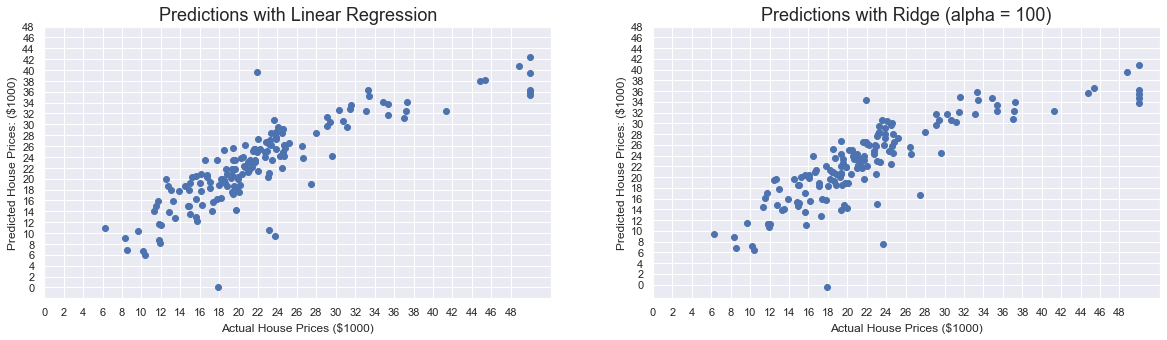

In [23]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)  #parameters: 1 row,  2 columns, first column
predictions_plot(y_test, y_lr_predict_test, "Predictions with Linear Regression")
plt.subplot(1, 2, 2) #parameters: 1 row,  2 columns, second column
predictions_plot(y_test, y_ridge_large_predict_test, "Predictions with Ridge (alpha = 100)")

We compare the coefficient of the models to see what effect the Ridge model produces on those coefficients.

In [24]:
linear_regressor.coef_

array([-1.28899229e-01,  4.62536564e-02, -5.41974027e-02,  3.83208843e+00,
       -1.24514995e+01,  3.72790367e+00,  7.37824474e-03, -1.19551784e+00,
        2.80152377e-01, -7.75364999e-03, -8.27122705e-01,  1.25331573e-02,
       -5.56644117e-01])

In [25]:
coef = pd.DataFrame() # on créé un dataframe pour analyser les coefficients
coef['features'] = boston_df.columns
coef['coef_linear_regressor'] = linear_regressor.coef_
#coef['coef_abs_linear_regressor'] = np.abs(linear_regressor.coef_[0])
coef['coef_ridge_small_alpha'] = ridge_regressor_small_alpha.coef_
#coef['coef_abs_ridge_small_alpha'] = np.abs(ridge_regressor_small_alpha.coef_[0])
coef['coef_ridge_large_alpha'] = ridge_regressor_large_alpha.coef_
#coef['coef_abs_ridge_large_alpha'] = np.abs(ridge_regressor_large_alpha.coef_[0])
coef.head(10)

,features,coef_linear_regressor,coef_ridge_small_alpha,coef_ridge_large_alpha
0,CRIM,-0.128899,-0.128870,-0.119732
1,ZN,0.046254,0.046262,0.057158
2,INDUS,-0.054197,-0.054673,-0.104483
3,CHAS,3.832088,3.829912,0.746560
4,NOX,-12.451500,-12.334650,-0.133496
5,RM,3.727904,3.729397,1.931807
6,AGE,0.007378,0.007270,0.014535
7,DIS,-1.195518,-1.193695,-0.954708
8,RAD,0.280152,0.279812,0.295646
9,TAX,-0.007754,-0.007756,-0.010598


[Text(0, 0, 'CRIM'),
 Text(0, 0, 'ZN'),
 Text(0, 0, 'INDUS'),
 Text(0, 0, 'CHAS'),
 Text(0, 0, 'NOX'),
 Text(0, 0, 'RM'),
 Text(0, 0, 'AGE'),
 Text(0, 0, 'DIS'),
 Text(0, 0, 'RAD'),
 Text(0, 0, 'TAX'),
 Text(0, 0, 'PTRATIO'),
 Text(0, 0, 'B'),
 Text(0, 0, 'LSTAT')]

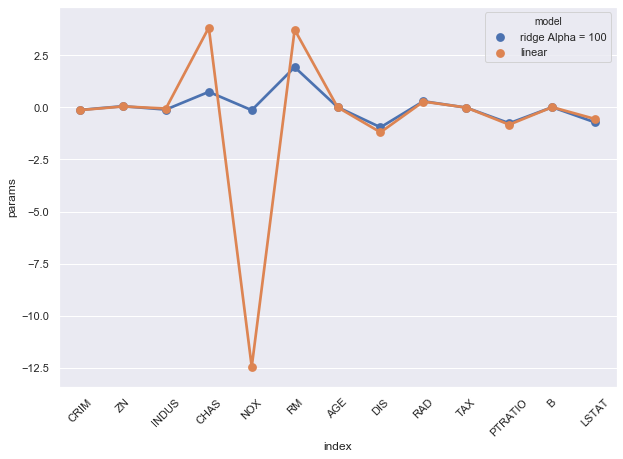

In [26]:
perf_ridge_large_alpha = pd.DataFrame({"params": coef['coef_ridge_large_alpha'], 
                                       "model": "ridge Alpha = 100", 
                                       "index": coef['features'] })

perf_lin = pd.DataFrame({"params": coef['coef_linear_regressor'], 
                         "model": "linear", 
                         "index": coef['features']})

perf_compar = pd.concat([perf_ridge_large_alpha,perf_lin])

import seaborn as sns
ax = sns.pointplot(x = 'index',y = 'params',hue = 'model', data = perf_compar)

ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

With Ridge (large alpha) we were able to penalize the coefficient of the NOX feature to limit its impact.

Let’s understand the plot below. On the X axis we plot the coefficient index and, for Boston data there are 13 features (for Python 0th index refers to 1st feature). For low value of α (0.01), when the coefficients are less restricted, the magnitudes of the coefficients are almost same as of linear regression. For higher value of α (100), we see that for coefficient indices 3,4,5 the magnitudes are considerably less compared to linear regression case. This is an example of shrinking coefficient magnitude using Ridge regression.

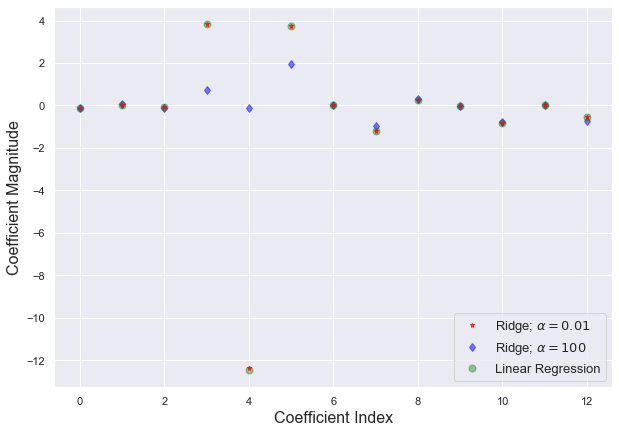

In [27]:
plt.plot(coef['coef_ridge_small_alpha'],alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7) # zorder for ordering the markers
plt.plot(coef['coef_ridge_large_alpha'],alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$') # alpha here is for transparency
plt.plot(coef['coef_linear_regressor'],alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.show()

We used GridSearchCV to determine the best alpha for the model prediction.

In [28]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(linear_regressor, boston.data,boston.target, cv = 10)) ### CrossValidation = 10
print(cross_val_score(ridge_regressor_small_alpha, boston.data,boston.target, cv = 10))
print(cross_val_score(ridge_regressor_large_alpha, boston.data,boston.target, cv = 10))

[ 0.73376082  0.4730725  -1.00631454  0.64113984  0.54766046  0.73640292
  0.37828386 -0.12922703 -0.76843243  0.4189435 ]
[ 0.73379224  0.4741527  -0.99413592  0.64093951  0.54826997  0.73671944
  0.37911902 -0.12931018 -0.7686915   0.41877368]
[ 0.6985193   0.47026291 -0.56355669  0.53236784  0.52320523  0.6872926
  0.23662939  0.29928304 -0.42187235  0.26155227]


In [29]:
boston.data[0]

array([6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
       6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
       4.980e+00])

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold


params = {'alpha':np.arange(0,1000,100),
            'normalize':[True,False]}
ridge = Ridge()

for a in np.arange(0,100,1):
  ridge = Ridge(alpha = a)
    
  kf = KFold(n_splits=10)
    
  for train_index, test_index in kf.split(np.ravel(boston.data)):
    ridge.fit([train_index], [test_index])

grid = GridSearchCV(ridge, params, cv=10)
grid_fit = grid.fit(X_train, y_train)

/Users/Carlo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/Users/Carlo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/Users/Carlo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/Users/Carlo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/Users/Carlo/anacond

In [31]:
grid_fit.best_params_

{'alpha': 0, 'normalize': False}

In [32]:
grid_fit.best_estimator_.score(X_test,y_test)

0.7147895265576849

In [33]:
Ridge(alpha=0).fit(X_train,y_train).score(X_test,y_test)

0.7147895265576849

Here we have the confirmation that the best model is the linear regression.

Now we can look at *learning curves*. These are plots of the model’s performance on the training set and the validation set as a function of the training set size. To generate the plots, simply train the model several times on different sized subsets of the training set. The following code defines a function that plots the learning curves of a model given some training data:

In [34]:
def plot_learning_curves(model, X, y, model_title):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)
    train_errors, test_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_test_predict = model.predict(X_test)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        test_errors.append(mean_squared_error(y_test_predict, y_test))
        
    plt.title(model_title, fontsize=18)
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="Train error")
    plt.plot(np.sqrt(test_errors), "b-", linewidth=3, label="Test error")
    plt.xlabel('Training set size',fontsize=16)
    plt.ylabel('RMSE',fontsize=16)
    plt.legend(loc='upper right')
    plt.xlim((0,150))

Let us explain the plot below. First, let’s look at the performance on the training data: when the training set size is until (around) 12, the model can fit them perfectly, which is why the curve starts at zero. But as new instances are added to the training set, it becomes impossible for the model to fit the training data perfectly, both because the data is noisy and because it is not linear at all. So the error on the training data goes up until it reaches a plateau, at which point adding new instances to the training set doesn’t make the average error much better or worse.

Now let’s look at the performance of the model on the validation data. When the model is trained on very few training instances, it is incapable of generalizing properly, which is why the validation error is initially quite big. Then as the model is shown more training examples, it learns and thus the validation error slowly goes down. However, once again a straight line cannot do a good job modeling the data, so the error ends up at a plateau, very close to the other curve.
These learning curves are typical of an underfitting model. Both curves have reached a plateau; they are close and fairly high.

Another observation: when there is a gap between the curves, the model performs better on the training data than on the validation data, which is the hallmark of an overfitting model. However, if you used a much larger training set, the two curves would continue to get closer.

Conclusion: for small training set sizes -> overfitting on the training set, which becomes better when we increase the training set size.

We can see that both on LinearRegression and Ridge for train set size inferior to 25, the test error is much higher, which suggests an overtraining. As the training set size increases, the two curves approach eachother.

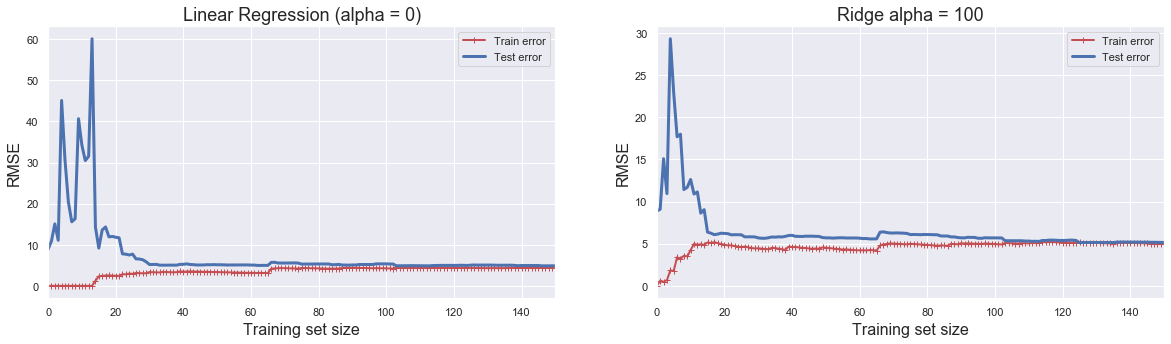

In [35]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)  #parameters: 1 row,  2 columns, first column
plot_learning_curves(LinearRegression(), boston_df, y, "Linear Regression (alpha = 0)")
plt.subplot(1, 2, 2) #parameters: 1 row,  2 columns, second column
plot_learning_curves(Ridge(alpha = 100), boston_df, y, "Ridge alpha = 100")

**The Bias/Variance Tradeoff**

An important theoretical result of statistics and Machine Learning is the fact that a model’s generalization error can be expressed as the sum of three very different errors: Bias, Variance, Irreducible error.

*Bias*: This part of the generalization error is due to wrong assumptions, such as assuming that the data is linear when it is actually quadratic. A high-bias model is most likely to underfit the training data.

*Variance*: This part is due to the model’s excessive sensitivity to small variations in the training data. A model with many degrees of freedom (such as a high-degree polynomial model) is likely to have high variance, and thus to overfit the training data.

*Irreducible error*: This part is due to the noisiness of the data itself. The only way to reduce this part of the error is to clean up the data (e.g., fix the data sources, such as broken sensors, or detect and remove outliers).

Increasing a model’s complexity will typically increase its variance and reduce its bias. Conversely, reducing a model’s complexity increases its bias and reduces its variance. This is why it is called a tradeoff.

## Conclusions
The Linear Regression has a smaller RMSE and a higher R2 score compared to Ridge (alpha = 100), so using these metrics the Linear Regression would be a better model to predict house prices. This was confirmed by the Grid Search that we run where we obtained Ridge with alpha = 0 (which is equivalent to a linear regression). We showed as well how the two models perform depending on the training set size, and the linear regression has a lower RMSE for higher sizes of the training set.